# Python road clipping example

By [Ben Welsh](http://palewi.re/who-is-ben-welsh/) and [Ellis Simani](https://twitter.com/emsimani?lang=en)

This is an example of how to use Python's geospatial tools to clip a shapefile of roads into segments using a polygon layer. It was developed during research for the March 16, 2018, _Los Angeles Times_ story ["Out of Control: The deadly toll of street racing in Los Angeles."](https://github.com/datadesk/street-racing-analysis/blob/master/notebook.ipynb) but never finalized for publication. It is presented here an experiment for others to consider and improve.

Here's a draft of the file that is ultimately created generated by QGIS.

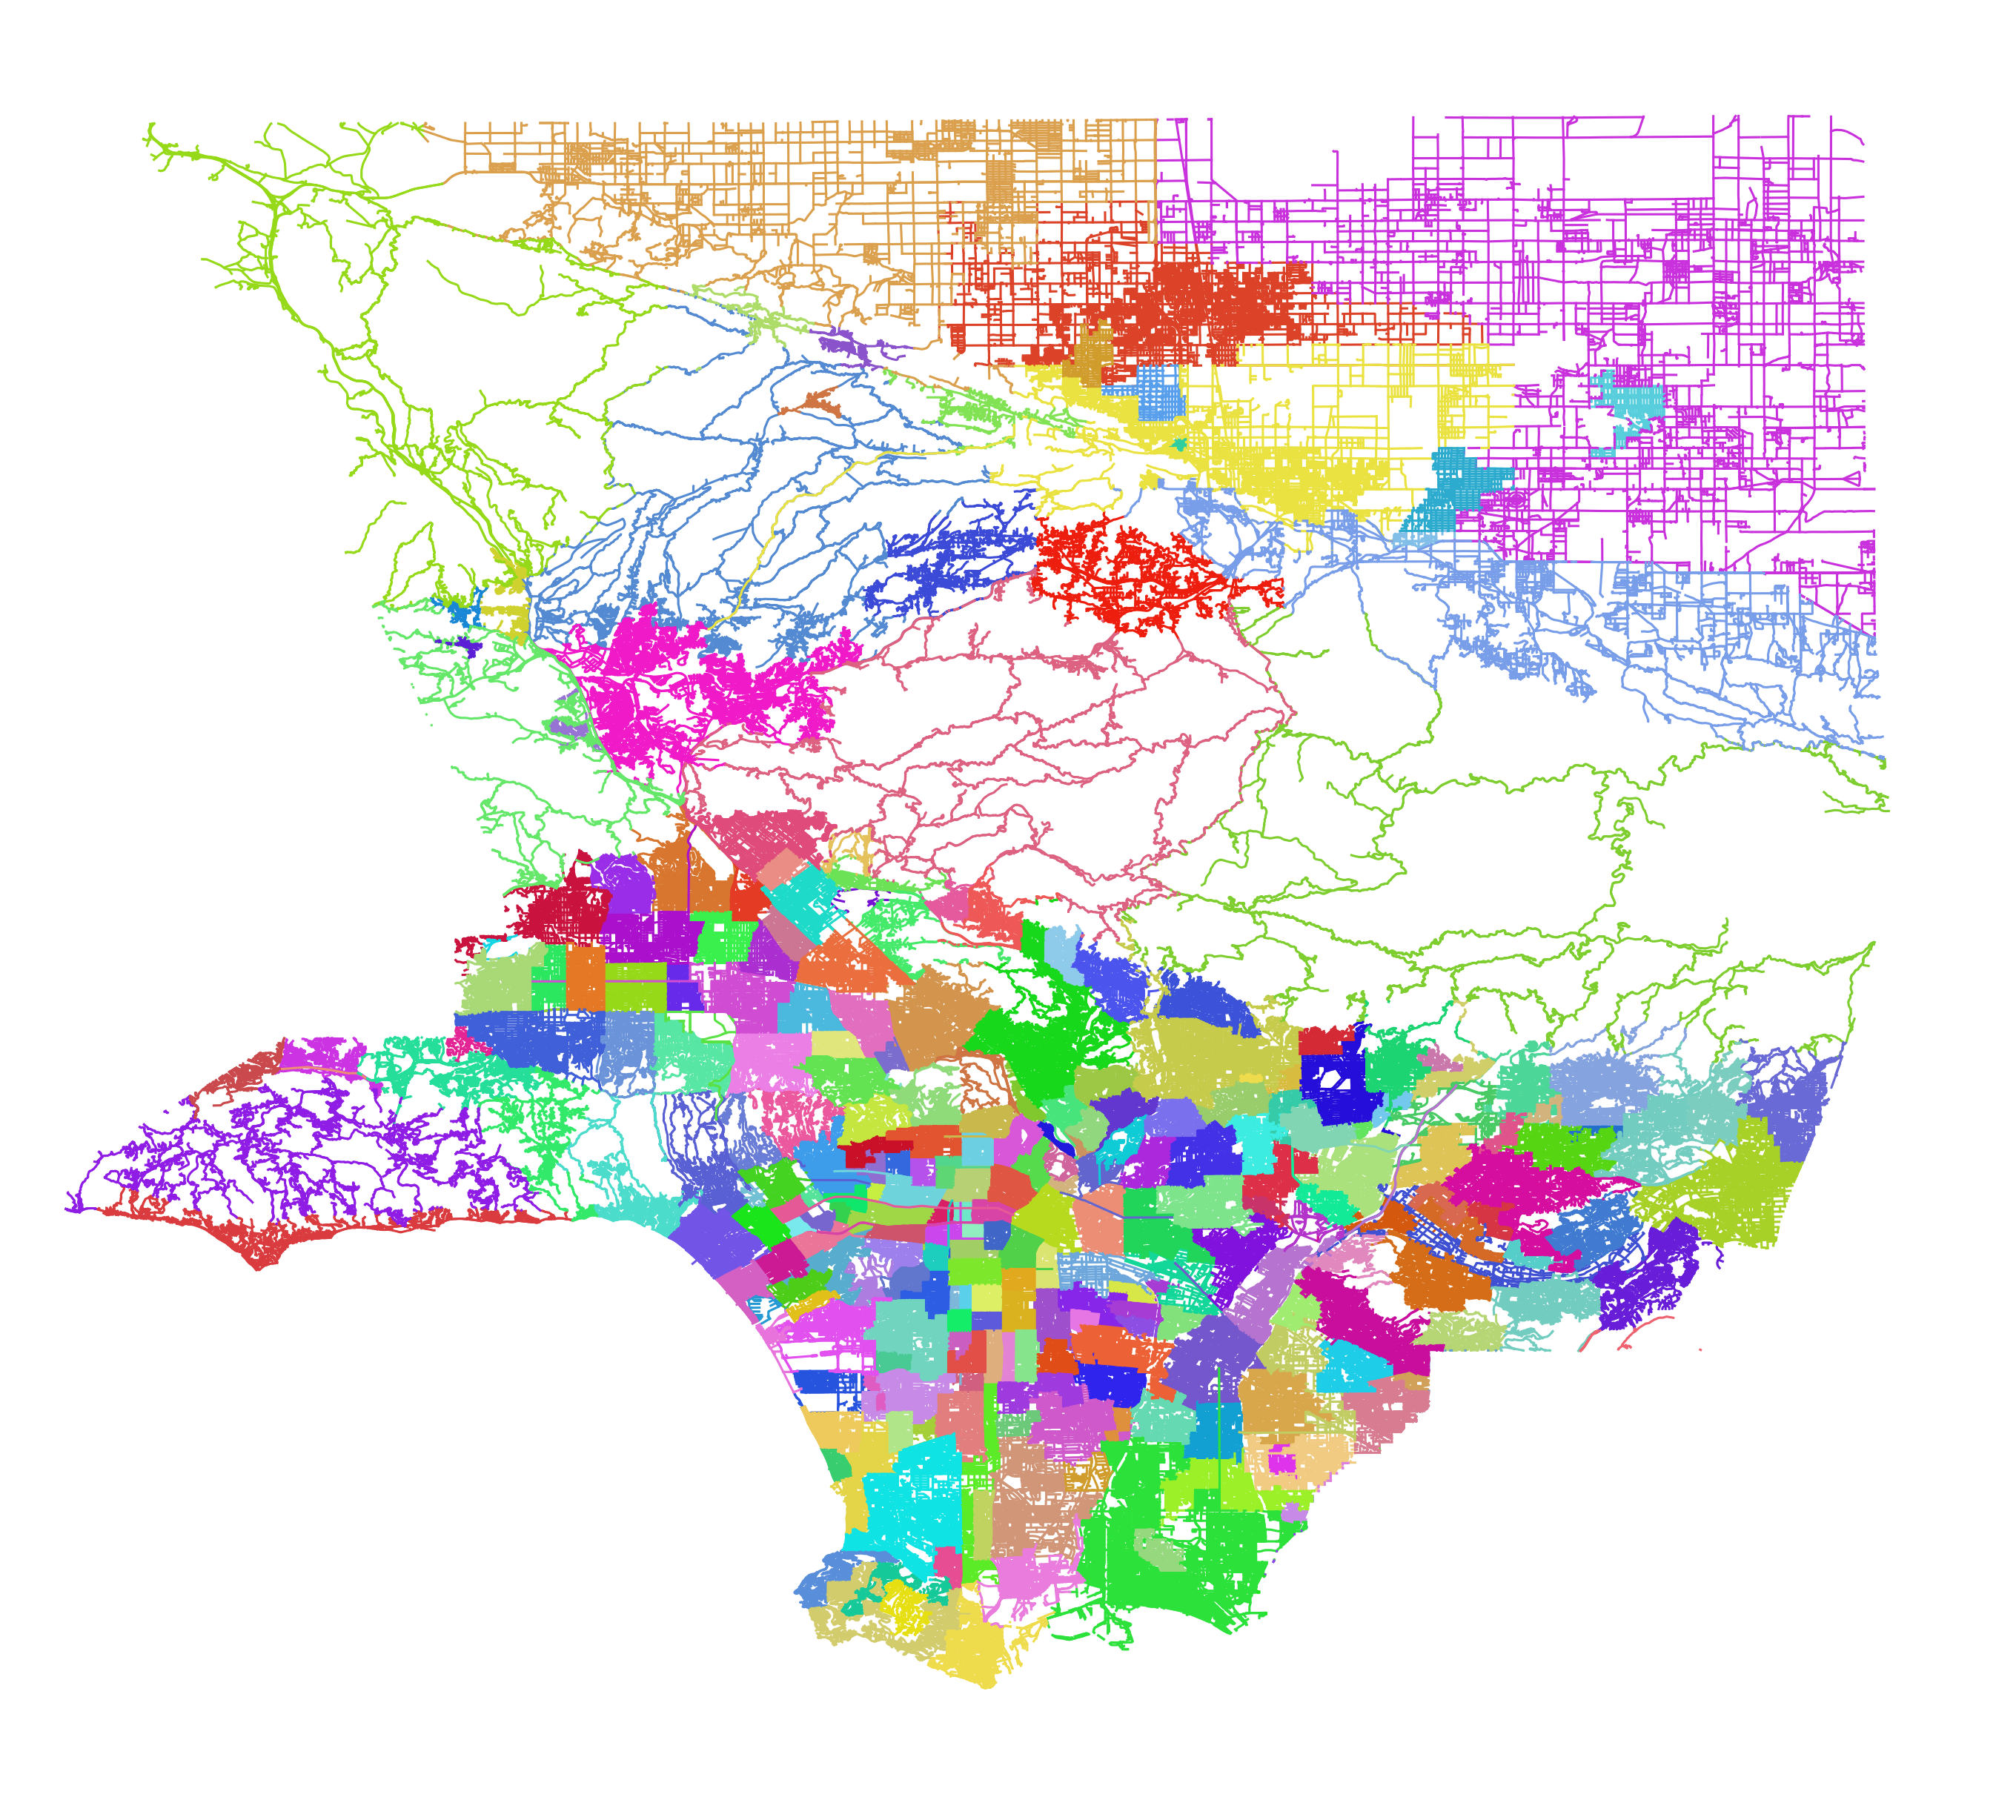

In [31]:
from IPython.display import Image, display
display(Image(filename='output/example.png', embed=True, width=600))

## How we did it

### Import Python tools

In [26]:
import fiona
from shapely.ops import split
from IPython.display import Image
from shapely.geos import TopologicalError
from shapely.geometry import mapping, shape

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

### Import roads

This is a a shapefile of all roads in Los Angeles County created by the U.S. Census

In [4]:
roads = fiona.open("./input/tl_2017_06037_roads.shp")

In [5]:
roads.crs

{'init': 'epsg:4269'}

### Import polygons

This is a shapefile of Los Angeles County neighborhoods developed by the [Los Angeles Times' Mapping L.A. project](http://maps.latimes.com).

In [6]:
hoods = fiona.open("./input/l.a. county neighborhood (v6).shp")

In [7]:
hoods.crs

{'init': 'epsg:4269'}

### Clip roads against polygons

In [8]:
def get_roads(hood):
    """
    Returns all the split road segments that fall within the provided neighborhood.
    """
    # Create a shape object from the hood
    hood_shp = shape(hood['geometry'])
    intersection_list = []
    # Loop through all the roads
    for road in roads:
        # Create a road shape object
        road_shp = shape(road['geometry'])
        # Check if the hood intersects with the road
        if road_shp.intersects(hood_shp):
            try:
                # If it does, split the road into pieces at the neighborhood boundary.
                split_geom = split(road_shp, hood_shp)
            except ValueError as e:
                continue
            # Loop through all the split pieces
            for geom in split_geom:
                # If the split piece intersects with the hood...
                if geom.intersects(hood_shp):
                    # .. package it up for distribution.
                    try:
                        # Grab the length of the split piece that intersects with the hood
                        ilength = geom.intersection(hood_shp).length
                    except TopologicalError as e:
                        ilength = None                 
                    intersection = dict(
                        # Convert the shape back to GeoJSON
                        geometry=mapping(geom),
                        properties=dict(
                            # Grab the length of the split piece as a whole
                            length=geom.length,
                            ilength=ilength,
                            # Grab whatever other metadata we want
                            hoodname=hood['properties']['name'],
                            roadname=road['properties']['FULLNAME']
                        )
                    )
                    # Add the piece to our list
                    intersection_list.append(intersection)
    # Return the list
    return intersection_list

In [10]:
print("Splitting roads into neighborhoods")
road_segments = []
for hood in hoods:
    split_roads = get_roads(hood)
    print("- {} ({})".format(hood['properties']['name'], len(split_roads)))
    road_segments.extend(split_roads)

Splitting roads into neighborhoods
- Acton (1798)
- Adams-Normandie (96)
- Agoura Hills (660)
- Agua Dulce (1493)
- Alhambra (810)
- Aliso and Wood Regional Park (0)
- Aliso Viejo (0)
- Alondra Park (164)
- Altadena (638)
- Anaheim (0)
- Angeles Crest (1575)
- Arcadia (806)
- Arleta (296)
- Arlington Heights (99)
- Artesia (206)
- Athens (168)
- Atwater Village (179)
- Avalon (130)
- Avocado Heights (505)
- Azusa (1261)
- Baldwin Hills/Crenshaw (284)
- Baldwin Park (1155)
- Bel-Air (436)
- Bellflower (1201)
- Bell Gardens (378)
- Bell (526)
- Beverly Crest (754)
- Beverly Grove (223)
- Beverly Hills (704)
- Beverlywood (120)
- Boyle Heights (870)
- Bradbury (261)
- Brea (7)
- Brentwood (923)
- Broadway-Manchester (291)
- Buena Park (23)
- Burbank (1332)
- Calabasas (1127)
- Canoga Park (347)
- Carson (2408)
- Carthay (79)
- Castaic Canyons (2294)
- Castaic (580)
- Central-Alameda (231)
- Century City (87)
- Cerritos (1190)
- Charter Oak (375)
- Chatsworth (989)
- Chatsworth Reservoir (

TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -117.84450100000018 34.587186000000003 at -117.84450100000018 34.587186000000003
TopologyEx

- Northeast Antelope Valley (3322)
- North El Monte (52)
- North Hills (404)
- North Hollywood (488)
- Northridge (678)
- North Tustin (0)
- Northwest Antelope Valley (2281)
- Northwest Palmdale (242)
- North Whittier (399)
- Norwalk (1375)
- Orange (0)
- Pacific Palisades (824)
- Pacoima (602)
- Palmdale (3907)
- Palms (249)
- Palos Verdes Estates (382)
- Panorama City (252)
- Paramount (1124)
- Pasadena (1831)
- Pico Rivera (1096)
- Pico-Robertson (190)
- Pico-Union (316)
- Placentia (0)
- Playa del Rey (197)
- Playa Vista (189)
- Pomona (2172)
- Porter Ranch (482)
- Quartz Hill (381)
- Rancho Dominguez (158)
- Rancho Palos Verdes (1408)
- Rancho Park (144)
- Rancho Santa Margarita (0)
- Redondo Beach (621)
- Reseda (411)


TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.62894100000015 34.501242000000147 at -118.62894100000015 34.501242000000147
TopologyEx

- Ridge Route (1599)
- Rolling Hills Estates (491)
- Rolling Hills (323)
- Ronald W. Caspers Wilderness Park (0)
- Rosemead (883)
- Rossmoor (0)
- Rowland Heights (1014)
- San Clemente (0)
- San Dimas (1711)
- San Fernando (272)
- San Gabriel (582)
- San Juan Capistrano (0)
- San Marino (423)
- San Pasqual (61)
- San Pedro (910)
- Santa Ana (0)
- Santa Clarita (6004)
- Santa Fe Springs (937)
- Santa Monica (1105)
- Sawtelle (305)
- Seal Beach (10)
- Sepulveda Basin (135)
- Shadow Hills (460)
- Sherman Oaks (799)
- Sierra Madre (308)
- Signal Hill (466)
- Silverado Canyon (0)
- Silver Lake (398)
- South Diamond Bar (34)
- Southeast Antelope Valley (3217)
- South El Monte (399)
- South Gate (885)
- South Park (119)
- South Pasadena (442)
- South San Gabriel (290)
- South San Jose Hills (272)
- South Whittier (919)
- Stanton (0)
- Stevenson Ranch (551)
- Studio City (748)
- Sunland (329)
- Sun Valley (664)
- Sun Village (397)
- Sylmar (956)
- Tarzana (664)
- Temple City (615)
- Toluca Lak

TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point -118.58397900000013 34.406374999999997 at -118.58397900000013 34.406374999999997
TopologyEx

- Unincorporated Santa Susana Mountains (1567)
- Universal City (11)
- University Park (206)
- Valinda (361)
- Valley Glen (408)
- Valley Village (216)
- Val Verde (204)
- Van Nuys (533)
- Venice (612)
- Vermont Knolls (133)
- Vermont-Slauson (152)
- Vermont Square (169)
- Vermont Vista (262)
- Vernon (297)
- Veterans Administration (84)
- View Park-Windsor Hills (252)
- Villa Park (0)
- Vincent (378)
- Walnut (903)
- Walnut Park (86)
- Watts (252)
- West Adams (219)
- West Carson (577)
- Westchester (684)
- West Compton (227)
- West Covina (2677)
- West Hills (721)
- West Hollywood (336)
- Westlake (389)
- Westlake Village (549)
- West Los Angeles (96)
- Westminster (0)
- Westmont (319)
- West Puente Valley (326)
- West Whittier-Los Nietos (570)
- Westwood (323)
- Whiting Ranch Wilderness Park (0)
- Whittier (1641)
- Whittier Narrows (175)
- Willowbrook (696)
- Wilmington (677)
- Windsor Square (79)
- Winnetka (446)
- Woodland Hills (1072)
- Yorba Linda (0)


### Cleaning up the clip

A small number of roads with very small polygon intersections will survive this method as "tails" with the vast majority of their length outside of the intersecting neighborhood. We can eliminate these by setting a minimum length and excluding any intersections that fall below it.

In [14]:
minimum_length = 1.990000e-12

In [21]:
qualified_road_segments = [
    r for r in road_segments if r['properties']['ilength'] is not None
        and r['properties']['ilength'] > minimum_length
]

### Export as a shapefile

In [22]:
schema = {
 'geometry': 'LineString',
 'properties': {
     u'roadname': 'str:100',
     u'hoodname': 'str:500',
     u'length': 'float:16',
     u'ilength': 'float:16',
 }}

In [25]:
print("Writing {} features".format(len(qualified_road_segments)))
with fiona.open("./output/road-segments-by-neighborhood.shp", "w", driver="ESRI Shapefile", crs=roads.crs, schema=schema) as target:
    [target.write(r) for r in qualified_road_segments]

Writing 160359 features
